In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model = tf.keras.models.load_model('facedetector.h5')
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                               

In [5]:
#expand_dims --> to convert the image to 4D
#in a neural network the image is recognized as a 4D 

**EXPAND_DIMS** 
* The np.expand_dims()function in this context is used to adjust the shape of the grayscale image to array to make it compatible with the expected input shape of a neural network
* Neural networks often expect input data to be in a certain shape or format
* For image data,it commonlyy requires a 4D tensor where the dimensions represent"(batchsize,height,width,channels).

**Gray:**
* initially it represents a 2D array containing pixel values of a grayscale image(height * width)
* np.expand_dims(gray,axis=0):
* This function call addsan extra dimension at the beginning of the array(at index 0),effectively turning the 2D array into a 3D array
* After this operation,the shape of the array changes from(height,width)to (1,height,width).
* This extra dimension added at the beginning corresponds to the batch size,which is often used in neural networks to process 
  multiple samples simultaneously

1/1 [==============================] - 0s 62ms/step
Pred= [[0.00692246 0.5623707  0.4307068 ]]
1
[0.00692246 0.5623707  0.4307068 ]
without_mask


<function matplotlib.pyplot.show(close=None, block=None)>

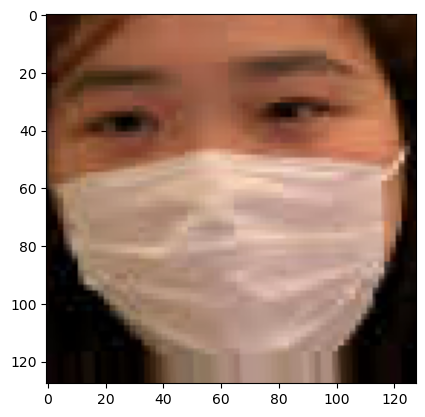

In [15]:
h,w = 100,100
img = image.load_img('270.png',target_size=(100,100,3))
imag = cv2.imread('270.png')
gray = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out = np.expand_dims(gray,axis=0)
final_img = out/255.0

pred = model.predict(final_img)
print('Pred=',pred)
#3 neuron values

max_index = np.argmax(pred[0])
print(max_index)
#arg --> gets the index position of the max-value of the array
emotions=('mask_weared_incorrect','without_mask','with_mask')
predicted_emotion = emotions[max_index]
print(pred[0])
print(predicted_emotion)
plt.imshow(cv2.cvtColor(imag,cv2.COLOR_BGR2RGB))
plt.show